In [1]:
from library.objective_function import *
from library.optimiser import *
from library.post_analysis import *
from library.experiments import *
%matplotlib inline
SEED = 12237

In [3]:
def do_multiple_exps(obj, opt, zoneParas):
    np.random.seed(SEED)
    
    # init multiple experiments
    mexps = multiple_experiment()

    # init one experiment
    exp = single_experiment()
    
    # One experiment: setup objective function and optimiser
    exp.set_objective(obj)
    exp.set_optimizer(opt)

    # Multiple experiment: setup one expreiment
    mexps.set_single_exp(exp)
    # Multiple experiment: setup sample zone    
    mexps.set_sample_zone(zoneParas)
    
    data = mexps.do()
    
    return data

# Original Ackley

## single experiment for checking

In [4]:
# 1 optimiser
np.random.seed(34)

inner_opt = line_search()
innerOptParas = {
    'x0': None,
    'alpha': 10,
    'beta': 0.1, 
    'max_iter': 100,
    'tol': 1e-2,              
    'verbose': False,
    'record': False
}
inner_opt.set_parameters(innerOptParas)

opt = cma_es()
optParas ={'x0': np.array([[140.743], [152.21]]),
           'std': np.ones((2,)) * 30, 
           'tol': 1e-3, 
           'adjust_func': inner_opt, 
           'record': True, 
           'verbose': True}
opt.set_parameters(optParas)

# 2 objective function
obj = ackley()

# init one experiment
exp = single_experiment()

# One experiment: setup objective function and optimiser
exp.set_objective(obj)
exp.set_optimizer(opt)
stats = exp.do()



*******starting optimisation from intitial mean:  [140.743 152.21 ]
eigenvalue of variance = [13.39551209 16.67930076]
total iterations = 24, total evaluatios = 3095
found minimum position = [ 1.48619337e-06 -2.01349147e-06], found minimum = 7.078538690752367e-06
Result:  global minimum
found minimum: 7.078538690752367e-06, minimum position: [ 1.48619337e-06 -2.01349147e-06], evals: 3095


In [6]:
ana = post_analysis_single(stats)

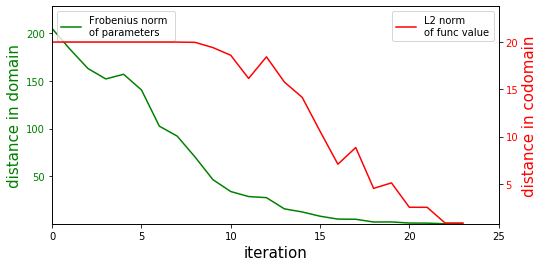

In [7]:
ana.plot_distance()

## adam

In [24]:
# 1 optimiser
opt = adam()
optParas = {
         'x0': None,
         'alpha': 1.9,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 2000,
         'tol': 1e-6,              
         'verbose': False,
         'record': False }
opt.set_parameters(optParas)

# 2 objective function
obj = ackley()

# 3 setup sample zone of multiple experiments
zoneParas = {'origin': np.array([0, 0]),
             'edge': np.array([200, 200]),
             'step': 10,
             'size': 10,
             'sym': True}

data = do_multiple_exps(obj, opt, zoneParas)

cost: 19.0704105897832, prob: 0.0
complete: 1 / 3 
cost: 20.191668138104077, prob: 0.0
complete: 3 / 3 
avg probility of convergence:  0.0
avg cost:  19.830442829449552
avg evals per exp:  2000.0
total time: 3.6314287185668945,  time per eval:0.00020174603992038301



In [12]:
ana_ad_ak = post_analysis_zone(data)

Text(0.5, 1, 'cost of ackley, optimised by adam')

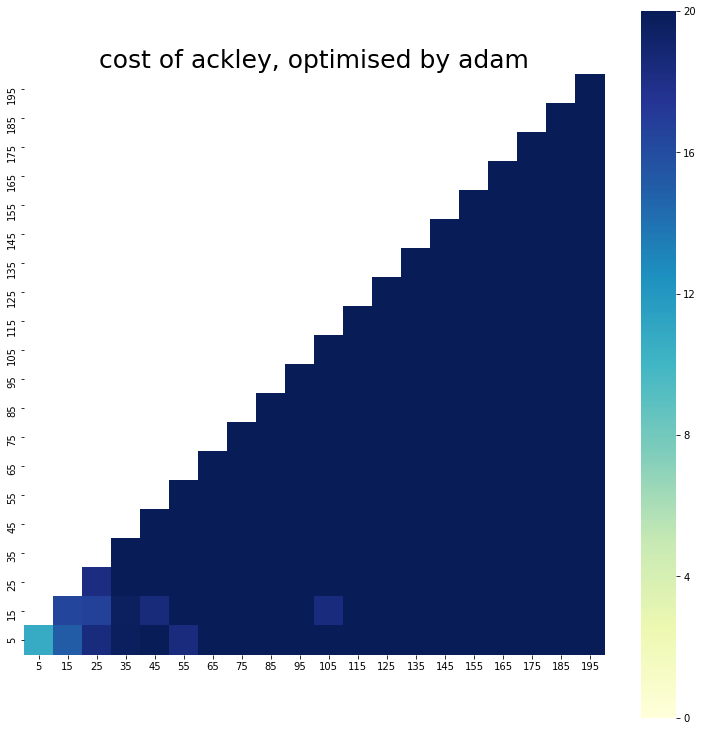

In [13]:
ax = ana_ad_ak.plot_hotmap_cost(20)
ax.set_title("cost of ackley, optimised by adam", fontsize=25)

## cma

In [3]:
# 1 optimiser
opt = cma_es()
optParas ={'x0': np.zeros((2,)),
           'std': np.ones((2,)) * 30, 
           'tol': 1e-5, 
           'adjust_func': do_nothing(), 
           'record': False, 
           'verbose': False}
opt.set_parameters(optParas)

# 2 objective function
obj = ackley()

# 3 setup sample zone of multiple experiments
zoneParas = {'origin': np.array([0, 0]),
             'edge': np.array([200, 200]),
             'step': 10,
             'size': 10,
             'sym': True}
data = do_multiple_exps(obj, opt, zoneParas)

cost: 4.0003501426055506, prob: 0.8
complete: 1 / 210 
cost: 4.343788253979852e-06, prob: 1.0
complete: 3 / 210 
cost: 2.0001762604000985, prob: 0.9
complete: 6 / 210 
cost: 2.486295727215309, prob: 0.8
complete: 10 / 210 
cost: 10.985654060469166, prob: 0.4
complete: 15 / 210 
cost: 7.816365295479633, prob: 0.6
complete: 21 / 210 
cost: 12.982004807905517, prob: 0.3
complete: 28 / 210 


/Users/huajian/Non-convex/library/optimiser.py:168: RuntimeWarning:

invalid value encountered in sqrt

/Users/huajian/Non-convex/library/optimiser.py:60: RuntimeWarning:

invalid value encountered in less

/Users/huajian/Non-convex/library/optimiser.py:63: RuntimeWarning:

invalid value encountered in less



diverge, raise LinAlgError!
cost: 12.004361763412696, prob: 0.4
complete: 36 / 210 
cost: 15.860477376958801, prob: 0.2
complete: 45 / 210 
cost: 17.5749878935063, prob: 0.1
complete: 55 / 210 
cost: 19.853516797941275, prob: 0.0
complete: 66 / 210 
cost: 16.277005982759892, prob: 0.1
complete: 78 / 210 
cost: 20.001549429695658, prob: 0.0
complete: 91 / 210 
diverge, raise LinAlgError!
cost: 15.981397836873233, prob: 0.2
complete: 105 / 210 
cost: 17.566169797885184, prob: 0.1
complete: 120 / 210 
diverge, raise LinAlgError!
cost: 20.003329138511237, prob: 0.0
complete: 136 / 210 
cost: 19.36615942944865, prob: 0.0
complete: 153 / 210 
diverge, raise LinAlgError!
diverge, raise LinAlgError!
cost: 19.938243747638523, prob: 0.0
complete: 171 / 210 
cost: 17.988630392968158, prob: 0.1
complete: 190 / 210 
diverge, raise LinAlgError!
diverge, raise LinAlgError!
diverge, raise LinAlgError!
cost: 20.003535221203897, prob: 0.0
complete: 210 / 210 
avg probility of convergence:  0.21714285714

In [4]:
ana_cma_ak = post_analysis_zone(data)

Text(0.5, 1, 'cost of ackley, optimised by cma')

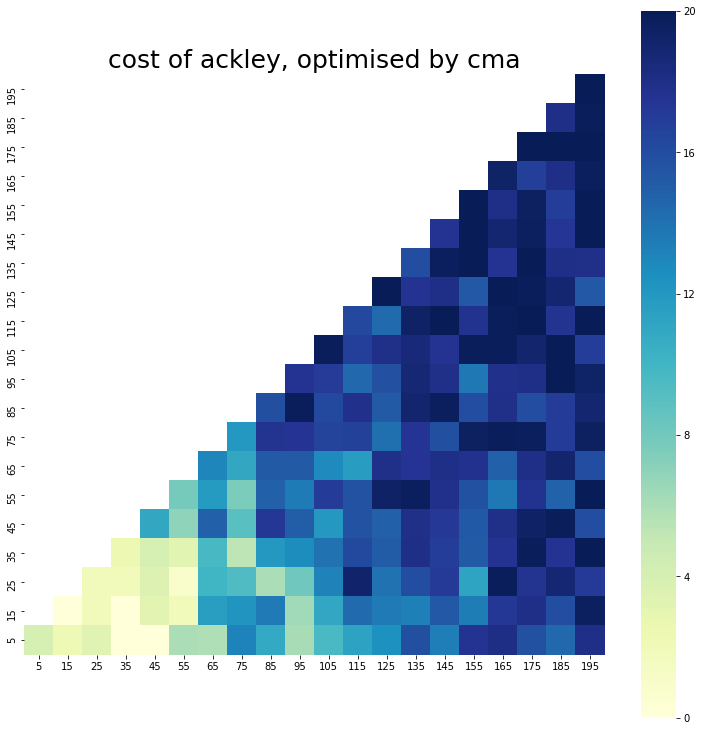

In [14]:
ax = ana_cma_ak.plot_hotmap_cost(20)
ax.set_title("cost of ackley, optimised by cma", fontsize=25)

## cma line search

In [6]:
# 1 optimiser
np.random.seed(23191)
inner_opt = line_search()
innerOptParas = {
    'x0': None,
    'alpha': 10,
    'beta': 0.1, 
    'max_iter': 100,
    'tol': 1e-2,              
    'verbose': False,
    'record': False
}
inner_opt.set_parameters(innerOptParas)

opt = cma_es()
optParas ={'x0': np.zeros((2,)),
           'std': np.ones((2,)) * 30, 
           'tol': 1e-5, 
           'adjust_func': inner_opt, 
           'record': False, 
           'verbose': False}
opt.set_parameters(optParas)

# 2 objective function
obj = ackley()

# 3 setup sample zone of multiple experiments
zoneParas = {'origin': np.array([0, 0]),
             'edge': np.array([200, 200]),
             'step': 10,
             'size': 10,
             'sym': True}
data = do_multiple_exps(obj, opt, zoneParas)

cost: 5.380235533625211e-06, prob: 1.0
complete: 1 / 210 
cost: 3.7347443858415374e-06, prob: 1.0
complete: 3 / 210 
cost: 4.298934346014249e-06, prob: 1.0
complete: 6 / 210 
cost: 4.561089876364832e-06, prob: 1.0
complete: 10 / 210 
cost: 4.391348062160461e-06, prob: 1.0
complete: 15 / 210 
cost: 5.8129946112650545e-06, prob: 1.0
complete: 21 / 210 
cost: 5.902845503502618e-06, prob: 1.0
complete: 28 / 210 
cost: 4.214060643636941e-06, prob: 1.0
complete: 36 / 210 
cost: 3.5896685603553634e-06, prob: 1.0
complete: 45 / 210 
cost: 5.693135876772004e-06, prob: 1.0
complete: 55 / 210 
cost: 5.610535871003464e-06, prob: 1.0
complete: 66 / 210 
cost: 3.7125817173411234e-06, prob: 1.0
complete: 78 / 210 
cost: 4.502196253586277e-06, prob: 1.0
complete: 91 / 210 
cost: 1.9795006245242956, prob: 0.9
complete: 105 / 210 
cost: 3.404496617154251e-06, prob: 1.0
complete: 120 / 210 
cost: 2.731670114375362e-06, prob: 1.0
complete: 136 / 210 
cost: 3.966176181524617e-06, prob: 1.0
complete: 153 / 

In [7]:
ana_cmals_ak = post_analysis_zone(data)

Text(0.5, 1, 'cost of ackley, by cma with line search')

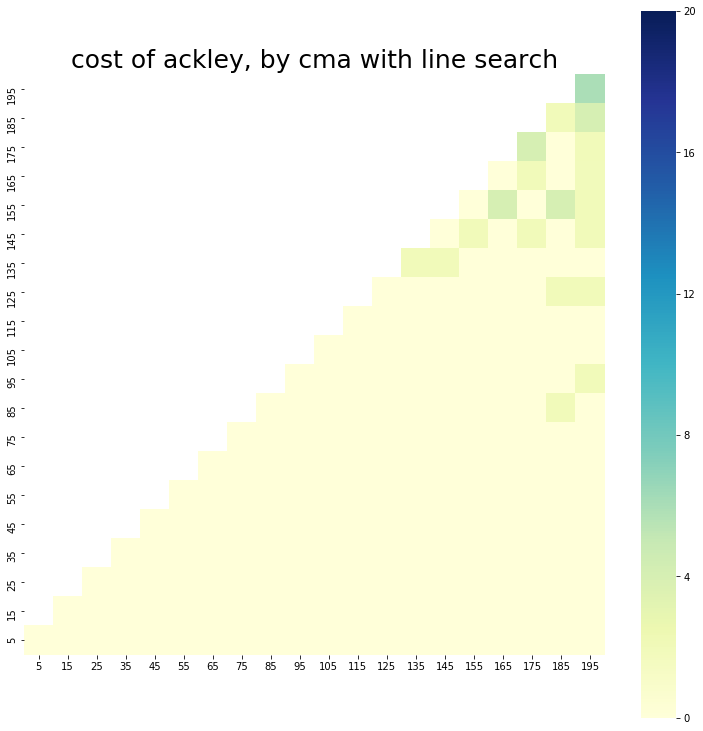

In [15]:
ax = ana_cmals_ak.plot_hotmap_cost(20)
ax.set_title("cost of ackley, by cma with line search", fontsize=25)

# bukin 

In [205]:
# 1 optimiser
opt = adam()
optParas = {
         'x0': None,
         'alpha': 1e-2,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 2000,
         'tol': 1e-3,              
         'verbose': False,
         'record': False }
opt.set_parameters(optParas)

# 2 objective function
obj = bukin()

# 3 setup sample zone of multiple experiments
zoneParas = {'origin': np.array([-15, -5]),
             'edge': np.array([30, 10]),
             'step': 1,
             'size': 10,
             'sym': False}

data = do_multiple_exps(obj, opt, zoneParas)

cost: 13.722949413503148, prob: 0.0
complete: 10 / 300 
cost: 14.64676433171778, prob: 0.0
complete: 20 / 300 
cost: 15.879292445960768, prob: 0.2
complete: 30 / 300 
cost: 15.685409822598178, prob: 0.0
complete: 40 / 300 
cost: 16.136426772401745, prob: 0.0
complete: 50 / 300 
cost: 16.143902735969824, prob: 0.0
complete: 60 / 300 
cost: 16.214949731760115, prob: 0.0
complete: 70 / 300 
cost: 13.95337255894366, prob: 0.0
complete: 80 / 300 
cost: 14.961455745988243, prob: 0.0
complete: 90 / 300 
cost: 10.02927719248002, prob: 0.0
complete: 100 / 300 
cost: 10.715602949412352, prob: 0.0
complete: 110 / 300 
cost: 12.47368507981316, prob: 0.0
complete: 120 / 300 
cost: 9.493590591813911, prob: 0.0
complete: 130 / 300 
cost: 12.014810651037166, prob: 0.0
complete: 140 / 300 
cost: 13.156984543993985, prob: 0.0
complete: 150 / 300 
cost: 14.324128255506235, prob: 0.0
complete: 160 / 300 
cost: 17.291434256828637, prob: 0.0
complete: 170 / 300 
cost: 16.299287907322586, prob: 0.0
complete:

Text(0.5, 1, 'cost of bukin, optimised by adam')

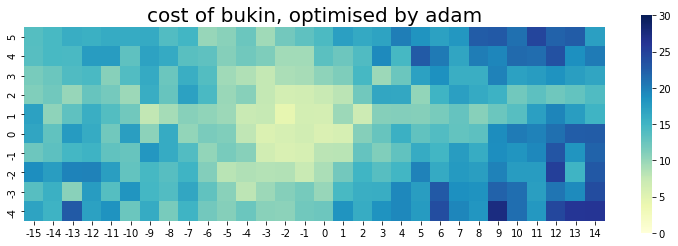

In [206]:
adam_quick_data = data
ana_ad_quick_bk = post_analysis_zone(adam_quick_data)
fig = plt.figure(figsize=(13, 4))
ax = ana_ad_quick_bk.plot_hotmap_cost(30)
ax.set_title("cost of bukin, optimised by adam", fontsize=20)

In [173]:
# 1 optimiser
opt = adam()
optParas = {
         'x0': None,
         'alpha': 0.01,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 2000,
         'tol': 1e-9,              
         'verbose': False,
         'record': False }
opt.set_parameters(optParas)

# 2 objective function
obj = bukin()

# 3 setup sample zone of multiple experiments
zoneParas = {'origin': np.array([-15, -5]),
             'edge': np.array([30, 10]),
             'step': 1,
             'size': 10,
             'sym': False}

data = do_multiple_exps(obj, opt, zoneParas)

cost: 14.00986387042326, prob: 0.0
complete: 10 / 300 
cost: 11.507794227328564, prob: 0.0
complete: 20 / 300 
cost: 10.213177052485417, prob: 0.3
complete: 30 / 300 
cost: 14.224090563395373, prob: 0.0
complete: 40 / 300 
cost: 15.960587840507785, prob: 0.0
complete: 50 / 300 
cost: 8.451629382360537, prob: 0.0
complete: 60 / 300 
cost: 12.3108475817919, prob: 0.0
complete: 70 / 300 
cost: 10.438761392422844, prob: 0.0
complete: 80 / 300 
cost: 11.152217260767369, prob: 0.0
complete: 90 / 300 
cost: 9.120692189222526, prob: 0.0
complete: 100 / 300 
cost: 11.372204464838486, prob: 0.0
complete: 110 / 300 
cost: 9.109706810482109, prob: 0.0
complete: 120 / 300 
cost: 8.987771968389875, prob: 0.0
complete: 130 / 300 
cost: 11.811069110117751, prob: 0.0
complete: 140 / 300 
cost: 12.133421218308353, prob: 0.0
complete: 150 / 300 
cost: 16.15410264418221, prob: 0.0
complete: 160 / 300 
cost: 20.968045743962442, prob: 0.0
complete: 170 / 300 
cost: 11.999287112914757, prob: 0.0
complete: 18

In [174]:
adam_data = data
ana_ad_less_bk = post_analysis_zone(adam_data)

Text(0.5, 1, 'cost of bukin, optimised by adam')

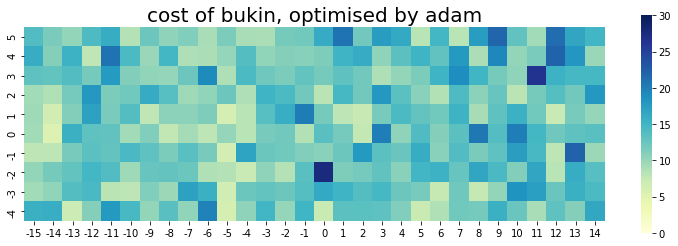

In [204]:
fig = plt.figure(figsize=(13, 4))
ax = ana_ad_less_bk.plot_hotmap_cost(30)
ax.set_title("cost of bukin, optimised by adam", fontsize=20)

## cma  + bukin

In [153]:
# 1 optimiser
opt = cma_es()
optParas ={'x0': np.zeros((2,)),
           'std': np.ones((2,)) * 3, 
           'tol': 1e-1, 
           'adjust_func': do_nothing(), 
           'record': False, 
           'max_iter':400,
           'verbose': False}
opt.set_parameters(optParas)

# 2 objective function
obj = bukin()

# 3 setup sample zone of multiple experiments
zoneParas = {'origin': np.array([-15, -5]),
             'edge': np.array([30, 10]),
             'step': 1,
             'size': 10,
             'sym': False}
data = do_multiple_exps(obj, opt, zoneParas)

cost: 0.21868461276382128, prob: 0.0
complete: 10 / 300 
cost: 0.20063810873661306, prob: 0.0
complete: 20 / 300 
cost: 0.2104152229774204, prob: 0.0
complete: 30 / 300 
cost: 0.2067996764199836, prob: 0.0
complete: 40 / 300 
cost: 0.1812744069031234, prob: 0.0
complete: 50 / 300 
cost: 0.18143636233757177, prob: 0.0
complete: 60 / 300 
cost: 0.18748856248790288, prob: 0.0
complete: 70 / 300 
cost: 0.20768797548630807, prob: 0.0
complete: 80 / 300 
cost: 0.2300081567110604, prob: 0.0
complete: 90 / 300 
cost: 0.19353735563080607, prob: 0.0
complete: 100 / 300 
cost: 0.23846367308657562, prob: 0.0
complete: 110 / 300 
cost: 0.23832709159619223, prob: 0.0
complete: 120 / 300 
cost: 0.2966019408628211, prob: 0.0
complete: 130 / 300 
cost: 0.2389046153708168, prob: 0.0
complete: 140 / 300 
cost: 0.20156921972725345, prob: 0.0
complete: 150 / 300 
cost: 0.18904552100573926, prob: 0.0
complete: 160 / 300 
cost: 0.2167736794789946, prob: 0.0
complete: 170 / 300 
cost: 0.21921471378225466, pro

In [154]:
cma_data = data

In [187]:
ana_cma_bk = post_analysis_zone(cma_data)

Text(0.5, 1, 'cost of bukin, optimised by cma')

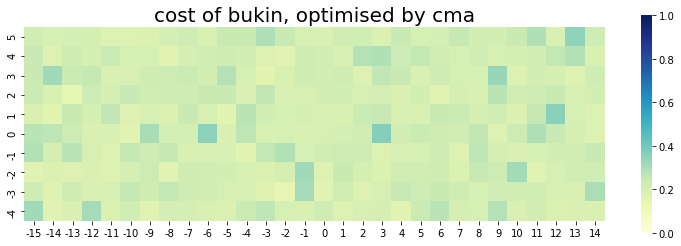

In [200]:
fig = plt.figure(figsize=(13, 4))
ax = ana_cma_bk.plot_hotmap_cost(1)
ax.set_title("cost of bukin, optimised by cma", fontsize=20)

In [190]:
# 1 optimiser
inner_opt = line_search()
innerOptParas = {
    'x0': None,
    'alpha': 1,
    'beta': 0.1, 
    'max_iter': 100,
    'tol': 1e-1,              
    'verbose': False,
    'record': False
}
opt = cma_es()
optParas ={'x0': np.zeros((2,)),
           'std': np.ones((2,)) * 3, 
           'tol': 1e-1, 
           'adjust_func': inner_opt, 
           'record': False, 
           'max_iter':5,
           'verbose': False}
opt.set_parameters(optParas)

# 2 objective function
obj = bukin()

# 3 setup sample zone of multiple experiments
zoneParas = {'origin': np.array([-15, -5]),
             'edge': np.array([30, 10]),
             'step': 1,
             'size': 10,
             'sym': False}
data = do_multiple_exps(obj, opt, zoneParas)

cost: 0.0011207780564264347, prob: 1.0
complete: 10 / 300 
cost: 0.001862466871102386, prob: 1.0
complete: 20 / 300 
cost: 0.001118050855191994, prob: 1.0
complete: 30 / 300 
cost: 0.00082745286117326, prob: 1.0
complete: 40 / 300 
cost: 0.0010016409169191364, prob: 1.0
complete: 50 / 300 
cost: 0.0012023129321044159, prob: 1.0
complete: 60 / 300 
cost: 0.0008106211952275243, prob: 1.0
complete: 70 / 300 
cost: 0.0011146128352432108, prob: 1.0
complete: 80 / 300 
cost: 0.0010790089621089862, prob: 1.0
complete: 90 / 300 
cost: 0.001353019467420758, prob: 1.0
complete: 100 / 300 
cost: 0.0016990077370244096, prob: 1.0
complete: 110 / 300 
cost: 0.002684754930315221, prob: 1.0
complete: 120 / 300 
cost: 0.002043581921418465, prob: 1.0
complete: 130 / 300 
cost: 0.00624222750816802, prob: 1.0
complete: 140 / 300 
cost: 0.0072275162193991245, prob: 1.0
complete: 150 / 300 
cost: 0.005218976302784969, prob: 1.0
complete: 160 / 300 
cost: 0.006599596205623554, prob: 1.0
complete: 170 / 300 


In [191]:
cmaln_data = data

In [192]:
ana_cmaln_bk = post_analysis_zone(cmaln_data)

Text(0.5, 1, 'cost of bukin, by cma with line search')

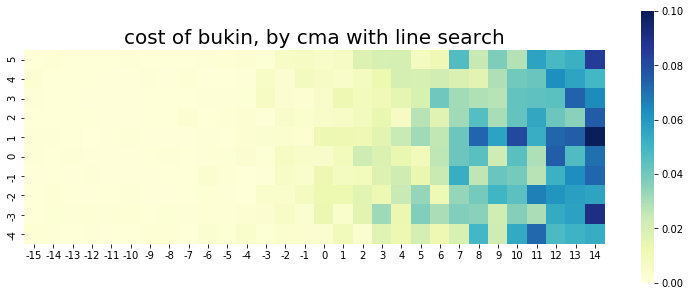

In [207]:
fig = plt.figure(figsize=(13, 5))
ax = ana_cmaln_bk.plot_hotmap_cost(0.1)
ax.set_title("cost of bukin, by cma with line search", fontsize=20)

In [57]:
# 1 optimiser
inner_opt = line_search()
innerOptParas = {
    'x0': None,
    'alpha': 1,
    'beta': 0.1, 
    'max_iter': 100,
    'tol': 1e-1,              
    'verbose': False,
    'record': False
}
opt = cma_es()
optParas ={'x0': np.zeros((2,)),
           'std': np.ones((2,)) * 3, 
           'tol': 1e-1, 
           'adjust_func': inner_opt, 
           'record': False, 
           'max_iter':5,
           'verbose': False}
opt.set_parameters(optParas)

# 2 objective function
obj = bukin()

# 3 setup sample zone of multiple experiments
zoneParas = {'origin': np.array([-15, -5]),
             'edge': np.array([30, 10]),
             'step': 1,
             'size': 10,
             'sym': False}
data = do_multiple_exps(obj, opt, zoneParas)

cost: 8.169583597145368e-05, prob: 1.0
complete: 10 / 300 
cost: 5.931898190585372e-05, prob: 1.0
complete: 20 / 300 
cost: 4.879705459724982e-05, prob: 1.0
complete: 30 / 300 
cost: 5.773234574933994e-05, prob: 1.0
complete: 40 / 300 
cost: 5.630650733837151e-05, prob: 1.0
complete: 50 / 300 
cost: 5.0035172679217873e-05, prob: 1.0
complete: 60 / 300 
cost: 5.652998421325427e-05, prob: 1.0
complete: 70 / 300 
cost: 3.925337245608774e-05, prob: 1.0
complete: 80 / 300 
cost: 7.40984989035276e-05, prob: 1.0
complete: 90 / 300 
cost: 7.421004003968257e-05, prob: 1.0
complete: 100 / 300 
cost: 6.716050880659453e-05, prob: 1.0
complete: 110 / 300 
cost: 7.722194183818233e-05, prob: 1.0
complete: 120 / 300 
cost: 5.682736983021287e-05, prob: 1.0
complete: 130 / 300 
cost: 5.728408923317653e-05, prob: 1.0
complete: 140 / 300 
cost: 9.625787457234481e-05, prob: 1.0
complete: 150 / 300 
cost: 4.023937756824303e-05, prob: 1.0
complete: 160 / 300 
cost: 4.1151179432615595e-05, prob: 1.0
complete:

In [58]:
ana_cmaln_bk = post_analysis_zone(data)

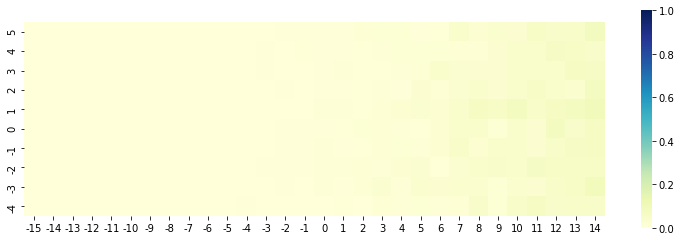

In [208]:
fig = plt.figure(figsize=(13, 4))
ana_cmaln_bk.plot_hotmap_cost(1)

# eggholder 

## adam

In [3]:
# 1 
obj = eggholder()

# 2
opt = adam()
optParas = {
         'x0': None,
         'alpha': 1e-2,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 2000,
         'tol': 1e-3,              
         'verbose': False,
         'record': False }
opt.set_parameters(optParas)

# 3 setup sample zone of multiple experiments
zoneParas = {'origin': np.array([-550,-550]),
             'edge': np.array([1100, 1100]),
             'step': 55,
             'size': 10,
             'sym': False}

data = do_multiple_exps(obj, opt, zoneParas)

cost: 1733.697667932663, prob: 0.0
complete: 20 / 400 
cost: 1360.8598353564116, prob: 0.0
complete: 40 / 400 
cost: 843.0154613373622, prob: 0.0
complete: 60 / 400 
cost: 153.53612567269212, prob: 0.0
complete: 80 / 400 
cost: 117.85828301373101, prob: 0.0
complete: 100 / 400 
cost: 304.5397742853322, prob: 0.0
complete: 120 / 400 
cost: 653.2340803850859, prob: 0.0
complete: 140 / 400 
cost: 847.63662857559, prob: 0.0
complete: 160 / 400 
cost: 1200.7371233453382, prob: 0.0
complete: 180 / 400 
cost: 1609.7988798644133, prob: 0.0
complete: 200 / 400 
cost: 1380.1217928193123, prob: 0.0
complete: 220 / 400 
cost: 1145.4561272331393, prob: 0.0
complete: 240 / 400 
cost: 969.7184757174367, prob: 0.0
complete: 260 / 400 
cost: 1034.1246220652306, prob: 0.0
complete: 280 / 400 
cost: 899.5090684365117, prob: 0.0
complete: 300 / 400 
cost: 402.8877491299786, prob: 0.0
complete: 320 / 400 
cost: 113.77023069489312, prob: 0.0
complete: 340 / 400 
cost: 557.6858374283383, prob: 0.0
complete: 

In [17]:
ana_adam_egg = post_analysis_zone(data)

Text(0.5, 1, 'cost of Eggholder, optimised by Adam')

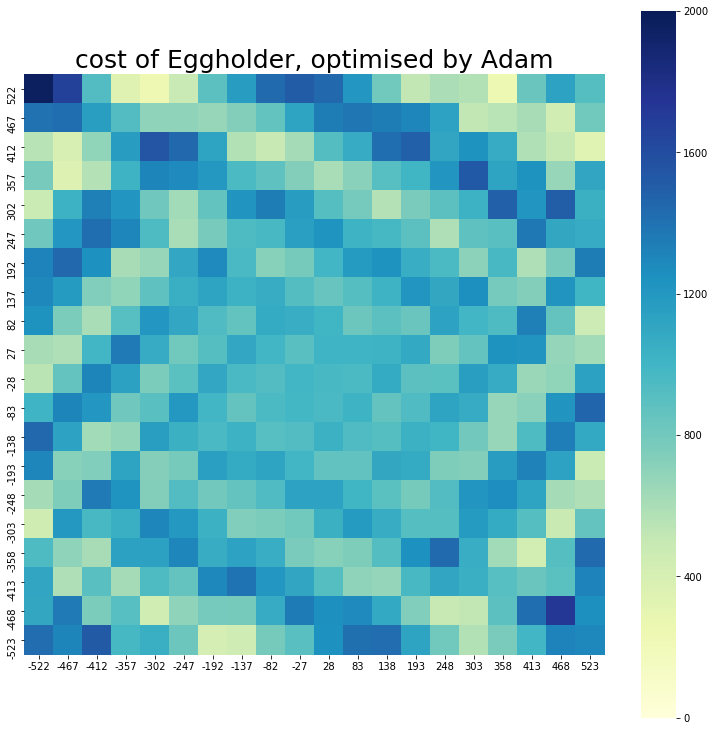

In [69]:
ax = ana_adam_egg.plot_hotmap_cost()
ax.set_title("cost of Eggholder, optimised by Adam", fontsize=25)

## no optimisation

In [13]:
# 1 
obj = eggholder()

# 2
opt = do_nothing()

# 3 setup sample zone of multiple experiments
zoneParas = {'origin': np.array([-550,-550]),
             'edge': np.array([1100, 1100]),
             'step': 55,
             'size': 10,
             'sym': False}

data = do_multiple_exps(obj, opt, zoneParas)

cost: 1965.5619819738265, prob: 0.0
complete: 20 / 400 
cost: 1666.6980358336623, prob: 0.0
complete: 40 / 400 
cost: 930.7896572955867, prob: 0.0
complete: 60 / 400 
cost: 351.53266115125587, prob: 0.0
complete: 80 / 400 
cost: 238.6697094869779, prob: 0.0
complete: 100 / 400 
cost: 484.6248544649326, prob: 0.0
complete: 120 / 400 
cost: 884.1053712749663, prob: 0.0
complete: 140 / 400 
cost: 1175.3991699518606, prob: 0.0
complete: 160 / 400 
cost: 1443.9465953386461, prob: 0.0
complete: 180 / 400 
cost: 1511.675914294919, prob: 0.0
complete: 200 / 400 
cost: 1450.926719216715, prob: 0.0
complete: 220 / 400 
cost: 1208.8490483662085, prob: 0.0
complete: 240 / 400 
cost: 806.906610464775, prob: 0.0
complete: 260 / 400 
cost: 523.1655109315852, prob: 0.0
complete: 280 / 400 
cost: 599.8631481562587, prob: 0.0
complete: 300 / 400 
cost: 572.6166288029705, prob: 0.0
complete: 320 / 400 
cost: 248.8770815359359, prob: 0.0
complete: 340 / 400 
cost: 842.6144195887686, prob: 0.0
complete: 36

In [19]:
ana_no_egg = post_analysis_zone(data)

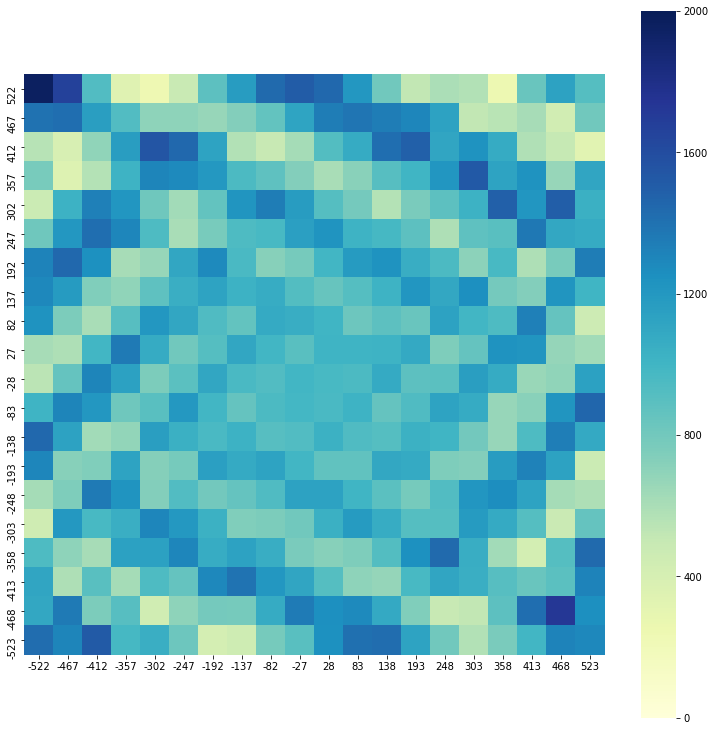

In [20]:
ana_no_egg.plot_hotmap_cost()

## cma 

In [22]:
# 1 optimiser
opt = cma_es()
optParas ={'x0': np.zeros((2,)),
           'std': np.ones((2,)) * 3, 
           'tol': 1e-3, 
           'adjust_func': do_nothing(), 
           'record': False, 
           'verbose': False}
opt.set_parameters(optParas)

# 2 objective function
obj = eggholder()

# 3 setup sample zone of multiple experiments
zoneParas = {'origin': np.array([-550,-550]),
             'edge': np.array([1100, 1100]),
             'step': 55,
             'size': 10,
             'sym': False}

data = do_multiple_exps(obj, opt, zoneParas)

cost: 450.9351674756105, prob: 0.0
complete: 20 / 400 
cost: 93.4508545679142, prob: 0.0
complete: 40 / 400 


/Users/huajian/Non-convex/library/optimiser.py:168: RuntimeWarning:

invalid value encountered in sqrt

/Users/huajian/Non-convex/library/optimiser.py:60: RuntimeWarning:

invalid value encountered in less

/Users/huajian/Non-convex/library/optimiser.py:63: RuntimeWarning:

invalid value encountered in less



diverge, raise LinAlgError!
cost: 80.57931999020921, prob: 0.0
complete: 60 / 400 
cost: 80.5793264661029, prob: 0.0
complete: 80 / 400 
cost: 80.57931030639166, prob: 0.0
complete: 100 / 400 
cost: 80.5793191344596, prob: 0.0
complete: 120 / 400 
cost: 146.63853338876652, prob: 0.0
complete: 140 / 400 
cost: 362.2494774494931, prob: 0.0
complete: 160 / 400 
cost: 329.9892972170207, prob: 0.0
complete: 180 / 400 
cost: 292.2865256960332, prob: 0.0
complete: 200 / 400 
cost: 166.82125877770628, prob: 0.0
complete: 220 / 400 
cost: 230.99936161081695, prob: 0.0
complete: 240 / 400 
cost: 231.0020325095643, prob: 0.0
complete: 260 / 400 
cost: 230.99957576366836, prob: 0.0
complete: 280 / 400 
cost: 188.07620550582484, prob: 0.0
complete: 300 / 400 
diverge, raise LinAlgError!
cost: 94.55442258902283, prob: 0.0
complete: 320 / 400 
cost: 87.92392202295646, prob: 0.0
complete: 340 / 400 
cost: 87.92390591489925, prob: 0.0
complete: 360 / 400 
cost: 38.315273901122154, prob: 0.2
complete: 3

In [23]:
ana_cma_egg = post_analysis_zone(data)

Text(0.5, 1, 'cost of Eggholder, optimised by CMA')

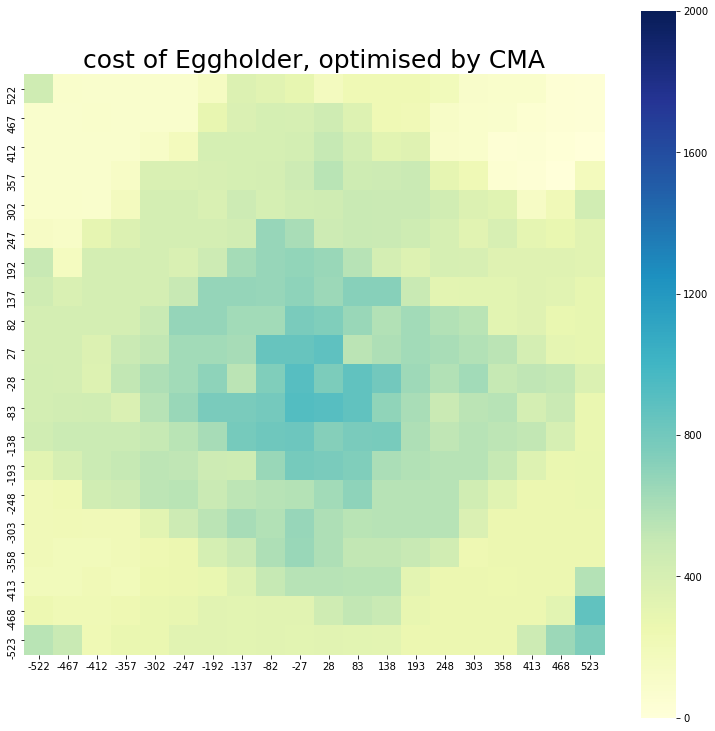

In [70]:
ax = ana_cma_egg.plot_hotmap_cost()
ax.set_title("cost of Eggholder, optimised by CMA", fontsize=25)

## cma-es with line search

In [28]:
# 1 optimiser
inner_opt = line_search()
innerOptParas = {
    'x0': None,
    'alpha': 1,
    'beta': 0.1, 
    'max_iter': 100,
    'tol': 1e-2,              
    'verbose': False,
    'record': False
}
inner_opt.set_parameters(innerOptParas)

opt = cma_es()
optParas ={'x0': np.zeros((2,)),
           'std': np.ones((2,)) * 3, 
           'tol': 1e-3, 
           'adjust_func': inner_opt, 
           'record': False, 
           'verbose': False}
opt.set_parameters(optParas)

# 2 objective function
obj = eggholder()

# 3 setup sample zone of multiple experiments
zoneParas = {'origin': np.array([-550,-550]),
             'edge': np.array([1100, 1100]),
             'step': 55,
             'size': 10,
             'sym': False}

data = do_multiple_exps(obj, opt, zoneParas)

/Users/huajian/Non-convex/library/objective_function.py:176: RuntimeWarning:

divide by zero encountered in double_scalars

/Users/huajian/Non-convex/library/objective_function.py:176: RuntimeWarning:

invalid value encountered in double_scalars



cost: 74.69078381104882, prob: 0.0
complete: 20 / 400 
cost: 67.36683225858759, prob: 0.1
complete: 40 / 400 
cost: 82.70905437520736, prob: 0.0
complete: 60 / 400 
cost: 81.82743420995028, prob: 0.0
complete: 80 / 400 
cost: 74.13514663811317, prob: 0.0
complete: 100 / 400 
cost: 92.02828570092106, prob: 0.0
complete: 120 / 400 
cost: 94.25568978578251, prob: 0.0
complete: 140 / 400 
cost: 410.92151192650215, prob: 0.0
complete: 160 / 400 
cost: 412.4320727060228, prob: 0.0
complete: 180 / 400 
cost: 455.06341770686083, prob: 0.0
complete: 200 / 400 
cost: 302.02931640032455, prob: 0.2
complete: 220 / 400 
cost: 268.9335186500843, prob: 0.1
complete: 240 / 400 
cost: 153.358289424014, prob: 0.2
complete: 260 / 400 
cost: 165.3866719406938, prob: 0.3
complete: 280 / 400 
cost: 100.88860941681989, prob: 0.2
complete: 300 / 400 
cost: 80.52643271559924, prob: 0.1
complete: 320 / 400 
cost: 40.55523210725331, prob: 0.3
complete: 340 / 400 
cost: 70.5121183216329, prob: 0.2
complete: 360 /

In [ ]:
ana_cmaln_egg = post_analysis_zone(data)

Text(0.5, 1, 'cost of Eggholder, by CMA with line search')

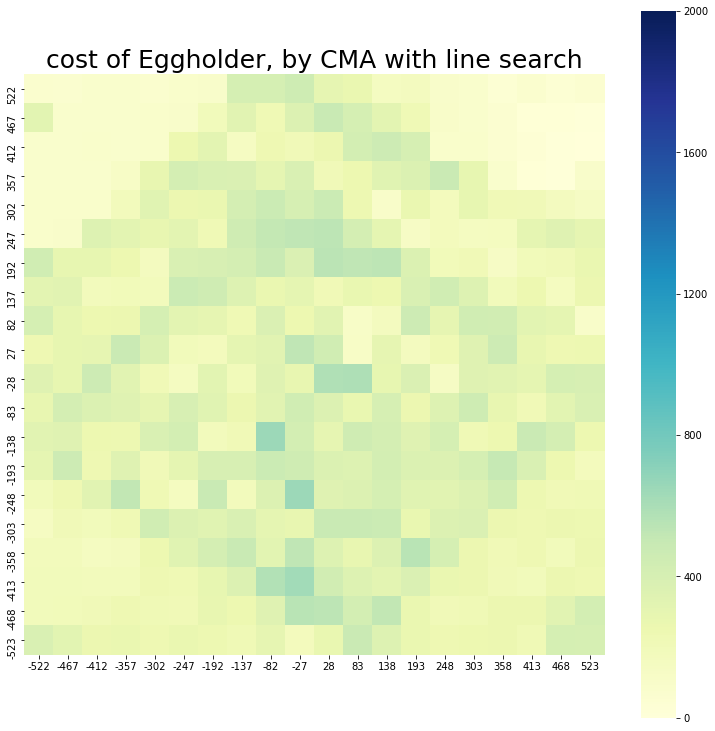

In [71]:
ax = ana_cmaln_egg.plot_hotmap_cost()
ax.set_title("cost of Eggholder, by CMA with line search", fontsize=25)

In [35]:
import time
class multiple_experiment:
    def set_sample_zone(self, paras):
        self.paras = paras
        self.origin = paras['origin']
        self.edge = paras['edge']
        self.step = paras['step']
        self.sym = paras['sym'] if 'sym' in self.paras.keys() else False
        self.size = paras['size']
    def set_single_exp(self, exp):
        self.exp = exp
    def do(self):
        # get derivative parameters
        num_x = int(self.edge[0] / self.step)
        num_y = int(self.edge[1] / self.step)
        abs_edge = np.zeros((2,))
        abs_edge[0] = self.origin[0] + self.edge[0]
        
        # initlise matrix to record results
        data = {}
        data['convergence'] = np.zeros((num_y, num_x))
        data['cost'] = np.zeros_like(data['convergence'])
        data['evals'] = np.zeros_like(data['convergence'])
        data['mask'] = np.ones_like(data['convergence'], dtype=np.uint8)
        data['x'] = np.zeros_like(data['convergence'])
        data['y'] = np.zeros_like(data['convergence'])     
        if self.sym and num_x == num_y:   
            total_num = (num_x + 1) * num_x / 2
        else:
            total_num = num_x * num_y
        
        start = time.time()
        for i, x in enumerate(np.arange(self.origin[0], abs_edge[0], self.step)):
            if self.sym:
                abs_edge[1] = self.origin[1] + x + self.step 
            else:
                abs_edge[1] = self.origin[1] + self.edge[1]
            for j, y in enumerate(np.arange(self.origin[1], abs_edge[1], self.step)):
                points = np.random.rand(self.size, 2) * self.step + np.array([x, y]) 
                data['mask'][num_y-1-j, i] = 0
                data['x'][num_y-1-j, i] = x
                data['y'][num_y-1-j, i] = y
                # calculate the probility of getting global minimum 
                res = np.zeros((self.size, ))
                costs = np.zeros_like(res)
                evals = np.zeros_like(res)
                for k in range(self.size):
                    self.exp.optimizer.x0 = points[k].reshape(2,1)
                    status, costs[k], evals[k] = self.exp.do()
                    if(status == 'global minimum'):
                        res[k] = 1
                data['convergence'][num_y-1-j, i] = np.mean(res)
                data['cost'][num_y-1-j, i] = np.mean(costs)
                data['evals'][num_y-1-j, i] = np.mean(evals)
            if self.sym:
                completed_num = (i + 1) * i / 2 + j + 1
            else:
                completed_num = i * num_y + j + 1
            print("cost: {}, prob: {}".format(data['cost'][num_y-1-j, i], data['convergence'][num_y-1-j, i]) )
            print("complete: {} / {} ".format(int(completed_num), int(total_num)))
        end = time.time()
        if self.sym:
            num = self.edge[0] / self.step
            num = (num + 1) * num / 2
        else:
            num = num_x * num_y
        data['paras'] = self.paras
        print("avg probility of convergence: ", data['convergence'].sum() / num)
        print("avg cost: ", data['cost'].sum() / num)
        print("avg evals per exp: ", data['evals'].sum() / num)
        print("total time: {},  time per eval:{}\n".format(end - start, (end - start)/num/data['evals'].sum()))
        return data

# tuned ackley

In [46]:
class post_analysis_zone:
    def __init__(self, data):
        self.paras = data['paras']
        self.origin = self.paras['origin']
        self.edge = self.paras['edge']
        self.step = self.paras['step']
        
        self.x = data['x']
        self.y = data['y']
        self.prob = data['convergence']
        self.cost = data['cost']
        self.evals = data['evals']
        self.mask = data['mask']
        
        self.xlabel = np.arange(self.origin[0], self.origin[0] + self.edge[0], self.step) + round(self.step/2)
        self.ylabel = np.arange(self.edge[1] + self.origin[1], self.origin[1], -self.step) - round(self.step/2)
        
    def __setup_axis(self, ax):
        sns.axes_style("white")
        ax.set_xticklabels(self.xlabel)
        ax.set_yticklabels(self.ylabel)
        
    def plot_scatter(self):
        fig = plt.figure(figsize=(10,10))
        sc = plt.scatter(self.x.ravel(), self.y.ravel(), c=self.prob.ravel(), marker='o', vmin=0, vmax=1, s=35, cmap='YlGnBu')
        plt.colorbar(sc)
        return ax
        
    def plot_hotmap_prob(self):
        fig = plt.figure(figsize=(13, 13))
        ax = sns.heatmap(self.prob, mask=self.mask, vmin=0, vmax=1, square=True,  cmap="YlGnBu")
        self.__setup_axis(ax)
        return ax

    def plot_hotmap_cost(self, max_cost):
        fig = plt.figure(figsize=(13, 13))
        ax = sns.heatmap(self.cost, mask=self.mask, vmin=0, vmax=max_cost, square=True,  cmap="YlGnBu")
        self.__setup_axis(ax)
        return ax

    def plot_hotmap_evals(self):
        fig = plt.figure(figsize=(13, 13))
        ax = sns.heatmap(self.evals, mask=self.mask, vmin=0, square=True,  cmap="YlGnBu")  
        self.__setup_axis(ax)
        return ax

## adam

In [52]:
# 1 optimiser
opt = adam()
optParas = {
         'x0': None,
         'alpha': 1e-1,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 2000,
         'tol': 1e-3,              
         'verbose': False,
         'record': False }
opt.set_parameters(optParas)

# 2 objective function
obj = tuned_ackley()

# 3 setup sample zone of multiple experiments
zoneParas = {'origin': np.array([0, 0]),
             'edge': np.array([20, 20]),
             'step': 1,
             'size': 10,
             'sym': True}

data = do_multiple_exps(obj, opt, zoneParas)

cost: 0.05046975578117099, prob: 1.0
complete: 1 / 210 
cost: 0.07337142349514458, prob: 1.0
complete: 3 / 210 
cost: 0.07972452676478632, prob: 0.9
complete: 6 / 210 
cost: 0.03033870781288641, prob: 1.0
complete: 10 / 210 
cost: 0.04157528313194767, prob: 1.0
complete: 15 / 210 
cost: 0.03769242682142071, prob: 1.0
complete: 21 / 210 
cost: 0.030206372102839652, prob: 1.0
complete: 28 / 210 
cost: 7.451499436980349, prob: 0.5
complete: 36 / 210 
cost: 14.874908617009126, prob: 0.0
complete: 45 / 210 
cost: 14.645257325100687, prob: 0.0
complete: 55 / 210 
cost: 14.64517426910867, prob: 0.0
complete: 66 / 210 
cost: 12.67690612632906, prob: 0.0
complete: 78 / 210 
cost: 12.680142978423703, prob: 0.0
complete: 91 / 210 
cost: 8.580159502602905, prob: 0.0
complete: 105 / 210 
cost: 8.269187847594358, prob: 0.0
complete: 120 / 210 
cost: 50.0, prob: 0.0
complete: 136 / 210 
cost: 50.0, prob: 0.0
complete: 153 / 210 
cost: 50.0, prob: 0.0
complete: 171 / 210 
cost: 50.0, prob: 0.0
complet

In [53]:
ana_ad_tak = post_analysis_zone(data)

Text(0.5, 1, 'cost of tuned ackley, optimised by adam')

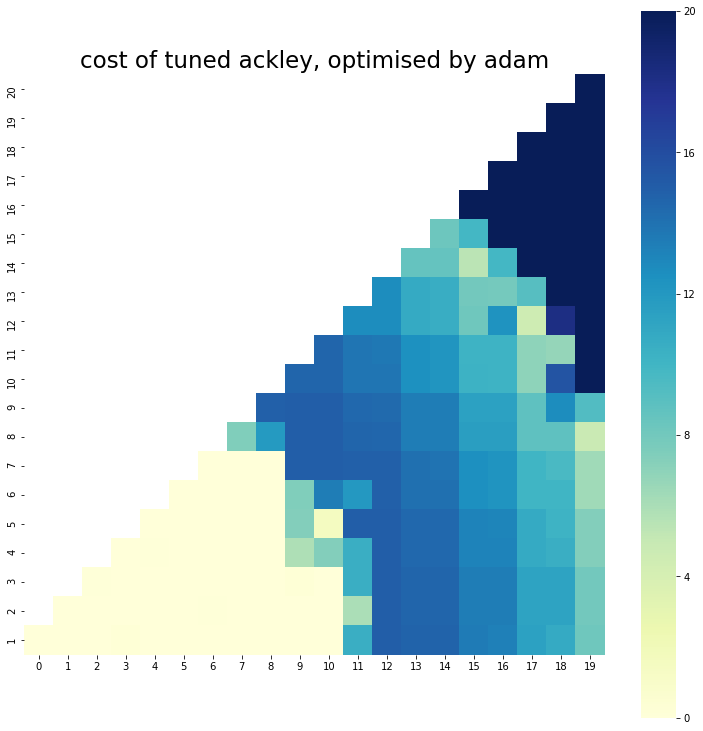

In [66]:
ax = ana_ad_tak.plot_hotmap_cost(20)
ax.set_title("cost of tuned ackley, optimised by adam", fontsize=23)

In [55]:
# 1 optimiser
opt = cma_es()
optParas ={'x0': np.zeros((2,)),
           'std': np.ones((2,)) * 3, 
           'tol': 1e-3, 
           'adjust_func': do_nothing(), 
           'record': False, 
           'verbose': False}
opt.set_parameters(optParas)

# 2 objective function
obj = tuned_ackley()

# 3 setup sample zone of multiple experiments
zoneParas = {'origin': np.array([0, 0]),
             'edge': np.array([20, 20]),
             'step': 1,
             'size': 10,
             'sym': True}

data = do_multiple_exps(obj, opt, zoneParas)

cost: 0.0002949743494571777, prob: 1.0
complete: 1 / 210 
cost: 0.0003050879612477075, prob: 1.0
complete: 3 / 210 
cost: 0.0003554989528986141, prob: 1.0
complete: 6 / 210 
cost: 0.0003906634434454048, prob: 1.0
complete: 10 / 210 
cost: 0.00021844765305729653, prob: 1.0
complete: 15 / 210 
cost: 0.0003064333273691489, prob: 1.0
complete: 21 / 210 
cost: 0.00034168304938155816, prob: 1.0
complete: 28 / 210 
cost: 0.7239307139524722, prob: 0.9
complete: 36 / 210 
cost: 0.858158878424295, prob: 0.9
complete: 45 / 210 
cost: 0.4729429467536347, prob: 0.9
complete: 55 / 210 
cost: 4.121557484795035, prob: 0.2
complete: 66 / 210 
cost: 4.113651954052825, prob: 0.3
complete: 78 / 210 
cost: 4.6926052038122466, prob: 0.1
complete: 91 / 210 
cost: 4.702962966546354, prob: 0.1
complete: 105 / 210 
cost: 4.374163461250666, prob: 0.2
complete: 120 / 210 
diverge, raise LinAlgError!
cost: 5.3751906323888345, prob: 0.0
complete: 136 / 210 
cost: 9.048296888570686, prob: 0.2
complete: 153 / 210 
co

In [56]:
ana_cma_tak = post_analysis_zone(data)

Text(0.5, 1, 'cost of tuned ackley, optimised by cma')

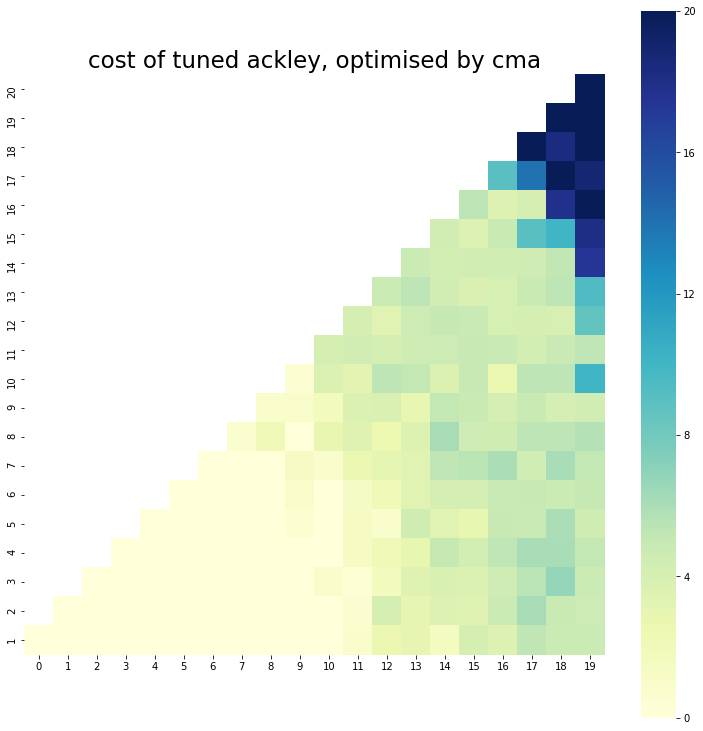

In [64]:
ax = ana_cma_tak.plot_hotmap_cost(20)
ax.set_title("cost of tuned ackley, optimised by cma", fontsize=23)

In [44]:
# 1 optimiser
inner_opt = line_search()
innerOptParas = {
    'x0': None,
    'alpha': 1,
    'beta': 0.1, 
    'max_iter': 100,
    'tol': 1e-2,              
    'verbose': False,
    'record': False
}
inner_opt.set_parameters(innerOptParas)

opt = cma_es()
optParas ={'x0': np.zeros((2,)),
           'std': np.ones((2,)) * 3, 
           'tol': 1e-3, 
           'adjust_func': inner_opt, 
           'record': False, 
           'verbose': False}
opt.set_parameters(optParas)

# 2 objective function
obj = tuned_ackley()

# 3 setup sample zone of multiple experiments
zoneParas = {'origin': np.array([0, 0]),
             'edge': np.array([20, 20]),
             'step': 1,
             'size': 10,
             'sym': True}

data = do_multiple_exps(obj, opt, zoneParas)

cost: 8.497193023728755e-05, prob: 1.0
complete: 1 / 210 
cost: 9.09162180647627e-05, prob: 1.0
complete: 3 / 210 
cost: 0.00010184041187208948, prob: 1.0
complete: 6 / 210 
cost: 0.00010586477659160209, prob: 1.0
complete: 10 / 210 
cost: 0.00013038676066834398, prob: 1.0
complete: 15 / 210 
cost: 4.718785825694738e-05, prob: 1.0
complete: 21 / 210 
cost: 3.660719164493287e-05, prob: 1.0
complete: 28 / 210 
cost: 8.339414890272679e-05, prob: 1.0
complete: 36 / 210 
cost: 6.456661908131878e-05, prob: 1.0
complete: 45 / 210 
cost: 0.4761637468758714, prob: 0.9
complete: 55 / 210 
cost: 0.36672097298630746, prob: 0.9
complete: 66 / 210 
cost: 3.102598063027215, prob: 0.3
complete: 78 / 210 
cost: 1.637405662349958, prob: 0.6
complete: 91 / 210 
cost: 3.0232987150064115, prob: 0.3
complete: 105 / 210 
diverge, raise LinAlgError!
diverge, raise LinAlgError!
cost: 2.6295766229887434, prob: 0.4
complete: 120 / 210 
diverge, raise LinAlgError!
cost: 3.1686605641122583, prob: 0.3
complete: 136

In [ ]:
ana_cmaln_tak = post_analysis_zone(data)

Text(0.5, 1, 'cost of tuned ackley, by cma with line search')

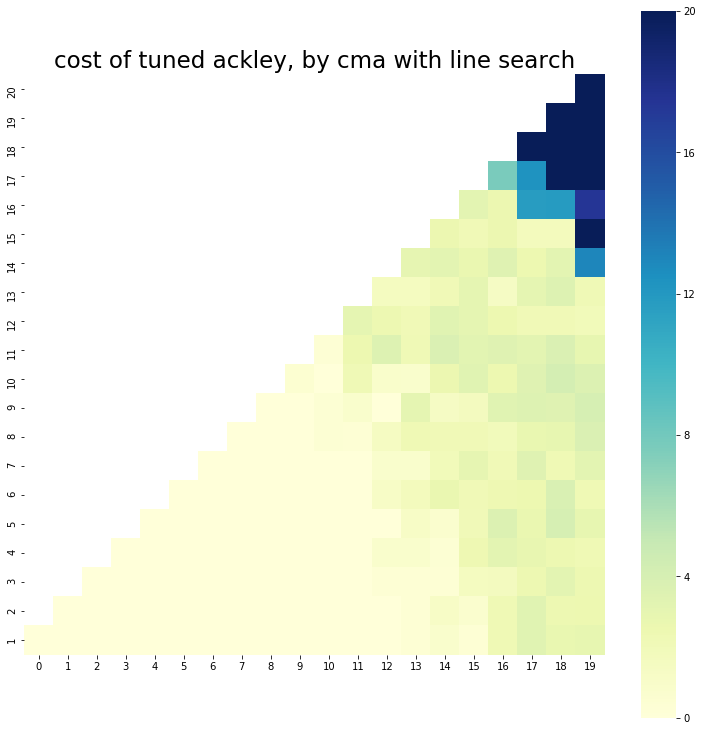

In [63]:
ax = ana_cmaln_tak.plot_hotmap_cost(20)
ax.set_title("cost of tuned ackley, by cma with line search", fontsize=23)